In [ ]:
from google.colab import files
files.upload()

Saving electric_vehicles_spec_2025.csv.csv to electric_vehicles_spec_2025.csv.csv


{'electric_vehicles_spec_2025.csv.csv': b'brand,model,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,fast_charging_power_kw_dc\r\nAbarth,500e Convertible,155,37.8,192,235,156,67\r\nAbarth,500e Hatchback,155,37.8,192,235,149,67\r\nAudi,A6 Sportback e-tron,210,75.8,150,435,136,150\r\nAudi,A6 Sportback e-tron performance,210,94.9,180,565,141,200\r\nAudi,A6 Sportback e-tron quattro,210,94.9,180,855,147,200\r\nAudi,Q4 Sportback e-tron 40,160,59,216,310,156,110\r\nAudi,Q4 Sportback e-tron 45,180,77,288,545,162,120\r\nAudi,Q4 Sportback e-tron 45 quattro,180,77,288,679,165,120\r\nAudi,Q4 Sportback e-tron 55 quattro,180,77,288,679,165,120\r\nAudi,Q4 e-tron 40,160,59,216,310,159,110\r\nAudi,Q4 e-tron 45,180,77,288,545,169,120\r\nAudi,Q4 e-tron 45 quattro,180,77,288,679,171,120\r\nAudi,Q4 e-tron 55 quattro,180,77,288,679,171,120\r\nAudi,Q6 e-tron,210,75.8,150,450,166,150\r\nAudi,Q6 e-tron Sportback,210,75.8,150,450,139,150\r\nAudi,Q6 e-tron Sportback performance

In [ ]:
# 📊 Electric Vehicles Specification Analysis - Google Colab

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Step 2: Load Dataset
url = 'https://raw.githubusercontent.com/praveendommeti/files/main/electric_vehicles_spec_2025.csv'
df = pd.read_csv('electric_vehicles_spec_2025.csv.csv')
print("Dataset Loaded")

# Step 3: Preprocessing
df.dropna(subset=['model'], inplace=True)
df['torque_nm'].fillna(df['torque_nm'].median(), inplace=True)
df['fast_charging_power_kw_dc'].fillna(df['fast_charging_power_kw_dc'].median(), inplace=True)
df.drop(['number_of_cells'], axis=1, inplace=True)  # too many missing values

# Encode categorical
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])

# Create Target Variable: high_efficiency
median_eff = df['efficiency_wh_per_km'].median()
df['high_efficiency'] = (df['efficiency_wh_per_km'] < median_eff).astype(int)

# Features and Target
X = df[['brand', 'top_speed_kmh', 'battery_capacity_kWh', 'torque_nm', 'fast_charging_power_kw_dc']]
y = df['high_efficiency']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:\n", cm)

# Step 6: 10-Fold Cross Validation (Decision Tree)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
dt_model = DecisionTreeClassifier()
scores = cross_val_score(dt_model, X_scaled, y, cv=kfold)
print("\nDecision Tree Cross-Validation Accuracy: {:.2f}%".format(scores.mean() * 100))


Dataset Loaded

Model: Decision Tree
Accuracy: 77.97%
Confusion Matrix:
 [[31  5]
 [ 8 15]]

Model: Naive Bayes
Accuracy: 69.49%
Confusion Matrix:
 [[22 14]
 [ 4 19]]

Model: SVM
Accuracy: 72.88%
Confusion Matrix:
 [[23 13]
 [ 3 20]]

Decision Tree Cross-Validation Accuracy: 82.98%


/tmp/ipython-input-3-1390550670.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['torque_nm'].fillna(df['torque_nm'].median(), inplace=True)
/tmp/ipython-input-3-1390550670.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

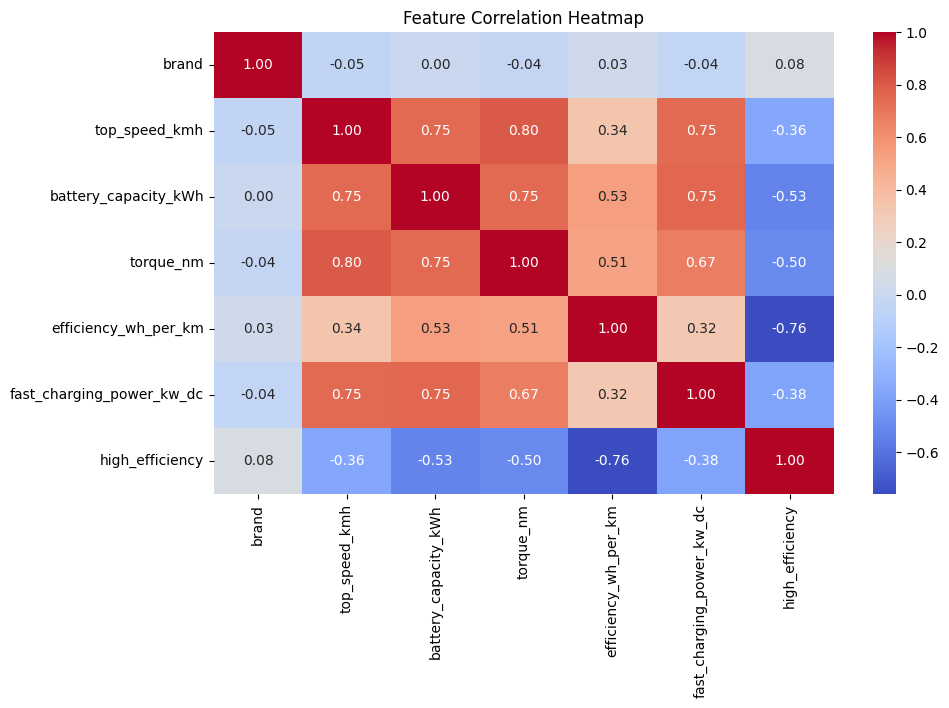

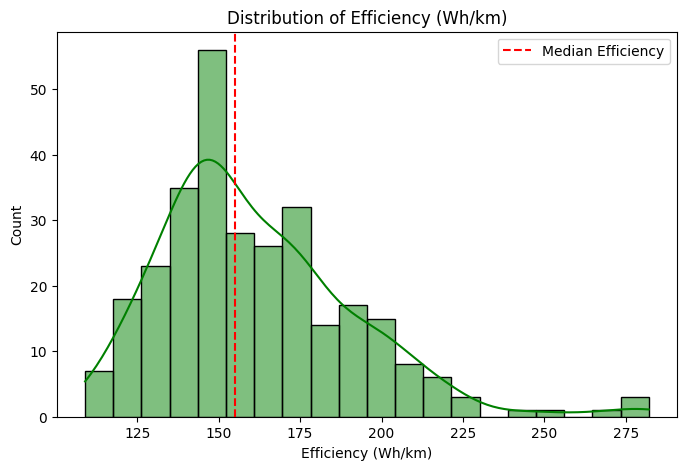

/tmp/ipython-input-5-1478197070.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')


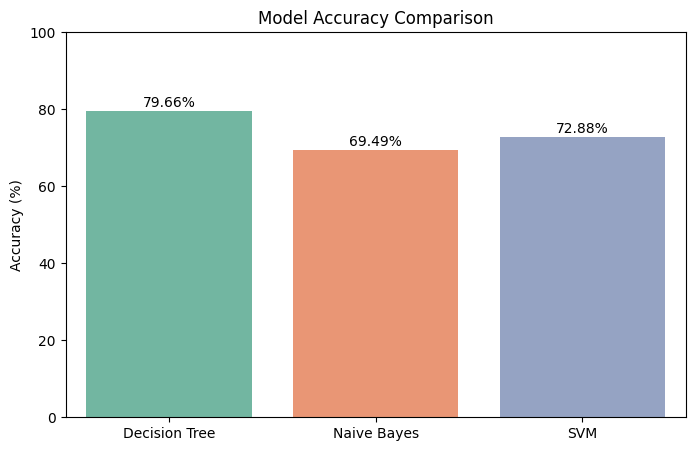

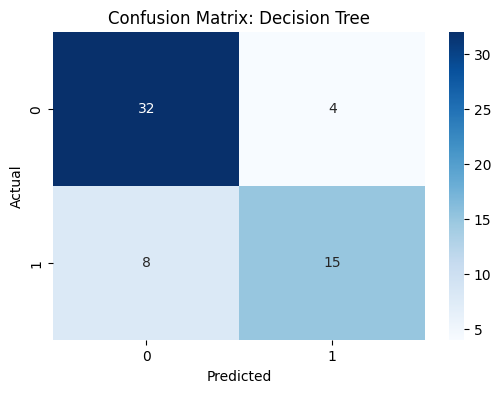

In [ ]:
# 📊 Additional Visualizations

# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
# Drop the 'model' column before calculating the correlation
sns.heatmap(df.drop('model', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Distribution of Efficiency
plt.figure(figsize=(8, 5))
sns.histplot(df['efficiency_wh_per_km'], bins=20, kde=True, color='green')
plt.axvline(median_eff, color='red', linestyle='--', label='Median Efficiency')
plt.title("Distribution of Efficiency (Wh/km)")
plt.xlabel("Efficiency (Wh/km)")
plt.ylabel("Count")
plt.legend()
plt.show()

# 3. Bar Plot of Accuracy for All Models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
for i, acc in enumerate(accuracies.values()):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center')
plt.show()

# 4. Confusion Matrix Heatmap for Best Model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
best_preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()